# Assessment Review

The topics covered will be:

1. SQL
2. Bayesian Statistics
3. Normal Distributions
4. Statistical Tests

In [ ]:
# from src.call import call_on_students

## Part 1: SQL

In [1]:
# Need to import pandas and sqlite3
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')

In [3]:
pd.read_sql(
    """
    SELECT *
    FROM Customer
    LIMIT 3
    """, conn
)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


In [4]:
pd.read_sql(
    """
    SELECT *
    FROM Invoice
    LIMIT 3
    """, conn
)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


### Task 1: Write a query to return the customer IDs for every customer in Germany.

In [ ]:
# call_on_students(1)

In [ ]:
pd.read_sql(
    """
    SELECT CustomerId
    FROM Invoice
    WHERE BillingCountry = "Germany"
    """, conn
)

### Task 2: Write a query to return the last names, email addresses and *billing* addresses of the customers who live in Canada.

In [ ]:
# call_on_students(1)

In [ ]:
pd.read_sql(
    """
    SELECT DISTINCT c.LastName, c.Email, i.BillingAddress
    FROM Customer c
    JOIN Invoice i
    ON c.CustomerId = i.CustomerId
    WHERE c.Country = "Canada"
    """, conn
)

### Task 3: Write a query to return the billing totals by country, in descending order of the totals.

In [ ]:
# call_on_students(1)

In [ ]:
pd.read_sql(
    """
    SELECT BillingCountry, SUM(Total) AS sum
    FROM Invoice
    GROUP BY BillingCountry
    ORDER BY sum DESC
    """, conn
)

### ***Task 4: Write a query to return the last names, email addresses, billing addresses, and most recent invoice dates for the customers whose most recent invoice is after Dec 31, 2011.

In [ ]:
# call_on_students(1)

In [ ]:
pd.read_sql(
    """
    WITH t AS
    (SELECT CustomerId, BillingAddress, MAX(InvoiceDate) as latestInvoice
    FROM Invoice
    WHERE InvoiceDate > "2011-12-31"
    GROUP BY CustomerId)
    
    SELECT LastName, Email, latestInvoice
    FROM Customer, t
    GROUP BY Customer.CustomerId
    """, conn
)

## Part 2: Bayesian Statistics

$$ P(A|B) = \dfrac{P(B|A)P(A)}{P(B)}$$

### The Prompt: 

> In the second session of the 98th congress in 1984, a congressman voted 'No' on providing aid to El Salvador. 
> 
> Given that 60% of the congress were Democrats, 75% of whom voted 'No' for providing aid to El Salvador, and only 5% of Republicans voted 'No' to the proposal, what is the conditional probability that this individual is a Democrat?

### Task 5: Calculate the probability

In [ ]:
# call_on_students(1)

**1. Which probability are we trying to find?**

   - P(Democrat | No)

**2. Based on that, what other pieces do we need?**

   - P(Democrat | No) = P(No | Democrat) * P(Democrat) / P(No)
   - SO:
   - P(No | Democrat) = .75
   - P(Democrat) = .6
   - P(No) = P(No | Dem) * P(Dem) + P(No | Rep) * P(Rep) = (.75 * .6) + (.06 * (1 - .6)) = .47
    

**3. Result?**

   - P(Democrat | No) = P(No | Democrat) * P(Democrat) / P(No)
   - P(Democrat | No) = .75 * .6 / .47 = .9574 &#8594; **96%!**
    

In [ ]:
# In code
p_dem = .6
p_rep = 1-p_dem

In [ ]:
p_no_given_dem = .75
p_no_given_rep = .05

In [ ]:
p_no = p_no_given_dem * p_dem + p_no_given_rep * p_rep
p_no

In [ ]:
p_dem_given_no = p_no_given_dem * p_dem / p_no
p_dem_given_no

## Part 3: Normal Distributions

In this part, you will analyze hours of sleep for Freshman at a University. We know that the population distribution of hours of sleep for Freshman at the University is normally distributed with a mean of 6 and a standard deviation of 2.

### Task 6: Create a numeric variable `z_eight` that contains the z-score for a Freshman that sleeps 8 hours 

In [ ]:
# call_on_students(1)

In [5]:
mu_fresh = 6
std_fresh = 2

# z_score = point - mu / std
z_eight = (8 - mu_fresh)/std_fresh
z_eight

1.0

### Task 7: Create a numeric variable `over_eight` containing the approximate proportion of Freshman who get more than 8 hours of sleep

In [ ]:
# call_on_students(1)

In [7]:
# best to import scipy stats!
from scipy import stats

In [ ]:
# right side of distribution - can use .sf or 1-CDF
print(1 - stats.norm(loc=mu_fresh, scale=std_fresh).cdf(8))
print(stats.norm(loc=mu_fresh, scale=std_fresh).sf(8))

In [8]:
# Can also get this answer more generally, based on the z-score
# Still the right side of distribution though
print(1 - stats.norm.cdf(z_eight))


0.15865525393145707


### Task 8: Calculate a 95% confidence interval for the amount of sleep for one Freshman who sleeps 7 times with a mean of 5 hours and a standard deviation of 0.5 hours

In [ ]:
# call_on_students(1)

In [10]:
# Let's capture these variables here
n = 7
mean = 5
std = 0.5

In [11]:
# More manual approach
# Need to calculate the standard error
sterr = std / (n ** 0.5)
# Use that to get to the margin of error
margin_error = stats.t.ppf(0.975, df=n-1) * sterr  # Using t because n=7
# Find our intervals
int_min = mean - margin_error
int_max = mean + margin_error
print(int_min, int_max)

4.53757712628571 5.46242287371429


In [12]:
# Using Scipy Stats
# Using t because n=7
stats.t.interval(alpha=.95,  # Confidence level
                 loc=mean,  # Mean
                 # Still need to calculate that standard error by hand
                 scale=sterr,
                 df=n-1)

(4.53757712628571, 5.46242287371429)

### Task 9: Interpret the 95% Confidence Interval that you derived in the above question

In [ ]:
# call_on_students(1)

- A 95% confidence interval means that there is a 95% chance for the interval to contain the true population mean. In this case, that means there is a 95% chance that the true mean of the distribution of hours of sleep likely for this Freshman is between 4.9 and 5.04 hours.


## Part 4: Hypothesis Testing

Let's make some hypotheses about cars!

### Task 10: Set Up

In [ ]:
# call_on_students(1)

In [13]:
# Imports - need pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Import the auto-mpg csv from the data folder
df = pd.read_csv("data/auto-mpg.csv")

In [15]:
# Check the head of our data
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Check the info on our data
df.info()

In [ ]:
# Describe the data
df.describe()

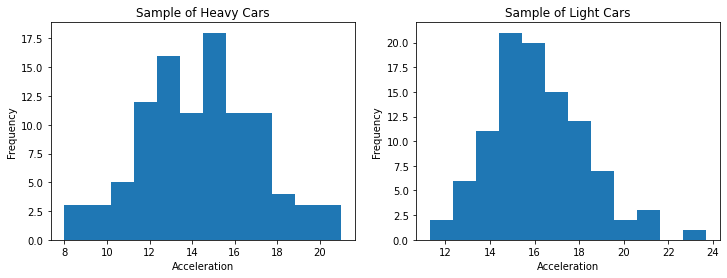

In [16]:
# Run this cell without changes to set up for the next set of questions

# Grabbing the median car weight
weight_median = df['weight'].median()

# Separating based on light cars and heavy cars
heavy_cars = df.loc[df['weight'] > weight_median].sample(n=100, random_state=42)
light_cars = df.loc[df['weight'] <= weight_median].sample(n=100, random_state=42)

# Plotting histograms for acceleration for both light and heavy cars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Heavy Cars')
ax1.set_xlabel('Acceleration')
ax1.set_ylabel('Frequency')
ax1.hist(heavy_cars['acceleration'], bins=12)

ax2.set_title('Sample of Light Cars')
ax2.set_xlabel('Acceleration')
ax2.set_ylabel('Frequency')
ax2.hist(light_cars['acceleration'], bins=12)
plt.show()

### The Prompt: 

> Car manufacturers want to know if light cars accelerate faster than heavy cars.

### Task 11: Set up the null and alternative hypotheses for this test

In [ ]:
# call_on_students(1)

**Null hypothesis:**
- light cars accelerate either slower than or equal to heavy cars

**Alternative hypothesis:**
- light cars accelerate faster than heavy cars

### Task 12: Describe your Type 1 and Type 2 errors in this context

In [ ]:
# call_on_students(1)

**Type I Error:**
- you find evidence that light cars accelerate faster than heavy cars, but actually they're the same or slower

**Type II Error:**
- you don't find evidence that light cars accelerate faster than heavy cars, but actually they are faster


### Task 13: The Hypothesis Test!

### 13a: Describe the type of test:

In [ ]:
# call_on_students(1)

- Two-sample independent t-test
- Right one-tailed test

### 13b: Run the test, using alpha = .05 and assuming that the samples have equal variance

In [ ]:
# call_on_students(1)

In [17]:
# No reason not to use stats here!
print(stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration']))

Ttest_indResult(statistic=5.00874014469676, pvalue=1.2096440668168987e-06)


### 13c: Analyze your results: can you reject the null hypothesis?

In [ ]:
# call_on_students(1)

- P-value is 1.2 x 10^-6 - very small! Smaller than .05
- We can reject the null hypothesis

In [ ]:
# In code: easiest to use p-value approach since we have it from the test!
alpha = .05
# Grab p-value from test:
p_value = stats.ttest_ind(light_cars['acceleration'], heavy_cars['acceleration'])[1]

print(f"Is T-test's P-Value ({p_value:.4f}) < alpha ({alpha})? {p_value < alpha}")